In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Read the file and view the shape and columns

loan_df=pd.read_csv("E:\Documents\AIML_masters\Week3\loan.csv")

#func to display shape and head of dataframe

def loan_df_info(df,rows=5):
    print("Shape:", loan_df.shape)
    print(loan_df.head(rows))
    print(loan_df.columns)

loan_df_info(loan_df) 



Shape: (39717, 111)
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN          

C:\Users\Leander Antony A\AppData\Local\Temp\ipykernel_16272\3541533435.py:9: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df=pd.read_csv("E:\Documents\AIML_masters\Week3\loan.csv")


In [2]:
#deleteling columns and rows 

# Find the count of NA values in each column
missing_counts = {col: loan_df[col].isna().sum() for col in loan_df.columns}


#Delete the columns with NA count more than 10% of the total rows i.e 4000
for col, count in missing_counts.items():
    if count > 4000:
        loan_df = loan_df.drop( columns = col)        

loan_df_info(loan_df)             
       

Shape: (39717, 53)
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0   10.65%       162.87     B        B2  ...          171.62   
1   15.27%        59.83     C        C4  ...          119.66   
2   15.96%        84.33     C        C5  ...          649.91   
3   13.49%       339.31     C        C1  ...          357.48   
4   12.69%        67.79     B        B5  ...           67.79   

  last_credit_pull_d collections_12_mths_ex_med  policy_code application_type  \
0             May-16                        0.

In [3]:
# removing columns that have little to no impact on analysis like descriptive,'0' values, IDs etc..
# Also removing columns that provide repetitive information like total_pymnt and total_pymnt_inv

loan_df = loan_df.drop( columns = ['id', 'member_id', 'grade', 'sub_grade', 'emp_title', 'pymnt_plan', 'url', 'purpose', 'title',
                                   'zip_code', 'addr_state', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'open_acc','pub_rec',  
                                   'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries', 
                                   'collection_recovery_fee','collections_12_mths_ex_med', 'policy_code', 'application_type', 'delinq_2yrs',
                                   'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt','pub_rec_bankruptcies', 'tax_liens','funded_amnt','funded_amnt_inv'])

loan_df_info(loan_df)

Shape: (39717, 20)
   loan_amnt        term int_rate  installment emp_length home_ownership  \
0       5000   36 months   10.65%       162.87  10+ years           RENT   
1       2500   60 months   15.27%        59.83   < 1 year           RENT   
2       2400   36 months   15.96%        84.33  10+ years           RENT   
3      10000   36 months   13.49%       339.31  10+ years           RENT   
4       3000   60 months   12.69%        67.79     1 year           RENT   

   annual_inc verification_status issue_d  loan_status    dti  \
0     24000.0            Verified  Dec-11   Fully Paid  27.65   
1     30000.0     Source Verified  Dec-11  Charged Off   1.00   
2     12252.0        Not Verified  Dec-11   Fully Paid   8.72   
3     49200.0     Source Verified  Dec-11   Fully Paid  20.00   
4     80000.0     Source Verified  Dec-11      Current  17.94   

  earliest_cr_line  inq_last_6mths  revol_bal revol_util  total_acc  \
0           Jan-85               1      13648     83.70%      

In [4]:
# formatting columns to ensure right data types and rounding to required precision etc..

# Removing '%' symbol and convert columns to numeric

loan_df['int_rate'] = loan_df['int_rate'].str.replace('%', '').astype(float)
loan_df['revol_util'] = loan_df['revol_util'].str.replace('%', '').astype(float)

#converting date columns to date type

date_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

for col in date_columns:
    loan_df[col] = pd.to_datetime(loan_df[col], format='%b-%y')

#rounding to appropriate decimal

loan_df['installment'] = loan_df['installment'].round()
loan_df['total_pymnt'] = loan_df['total_pymnt'].round(2)

print(loan_df.dtypes)


loan_amnt                       int64
term                           object
int_rate                      float64
installment                   float64
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
dti                           float64
earliest_cr_line       datetime64[ns]
inq_last_6mths                  int64
revol_bal                       int64
revol_util                    float64
total_acc                       int64
total_pymnt                   float64
last_pymnt_d           datetime64[ns]
last_pymnt_amnt               float64
last_credit_pull_d     datetime64[ns]
dtype: object


In [5]:
# removal of rows

# removing the current borrowers from the dataframe as they are not required for analysis

loan_df = loan_df[loan_df['loan_status'] != 'Current']

# removing the 'OTHER' and 'NONE' from the 'home_ownership' column

loan_df = loan_df[(loan_df['home_ownership'] != 'NONE') & (loan_df['home_ownership'] != 'OTHER')]

# removing rows from the dataframe where the columns have small number of NA values

missing_counts = {col: loan_df[col].isna().sum() for col in loan_df.columns}
for col, count in missing_counts.items():
    print(f'the missing values in {col} are {count}') 
    
    if count > 0:
        loan_df = loan_df.dropna(subset=[col])

print()

# The missing count after removal

missing_counts = {col: loan_df[col].isna().sum() for col in loan_df.columns}        
for col, count in missing_counts.items():
    print(f'the missing values in {col} after removal {count}')  
    
loan_df_info(loan_df)
    


the missing values in loan_amnt are 0
the missing values in term are 0
the missing values in int_rate are 0
the missing values in installment are 0
the missing values in emp_length are 1033
the missing values in home_ownership are 0
the missing values in annual_inc are 0
the missing values in verification_status are 0
the missing values in issue_d are 0
the missing values in loan_status are 0
the missing values in dti are 0
the missing values in earliest_cr_line are 0
the missing values in inq_last_6mths are 0
the missing values in revol_bal are 0
the missing values in revol_util are 48
the missing values in total_acc are 0
the missing values in total_pymnt are 0
the missing values in last_pymnt_d are 71
the missing values in last_pymnt_amnt are 0
the missing values in last_credit_pull_d are 2

the missing values in loan_amnt after removal 0
the missing values in term after removal 0
the missing values in int_rate after removal 0
the missing values in installment after removal 0
the mi

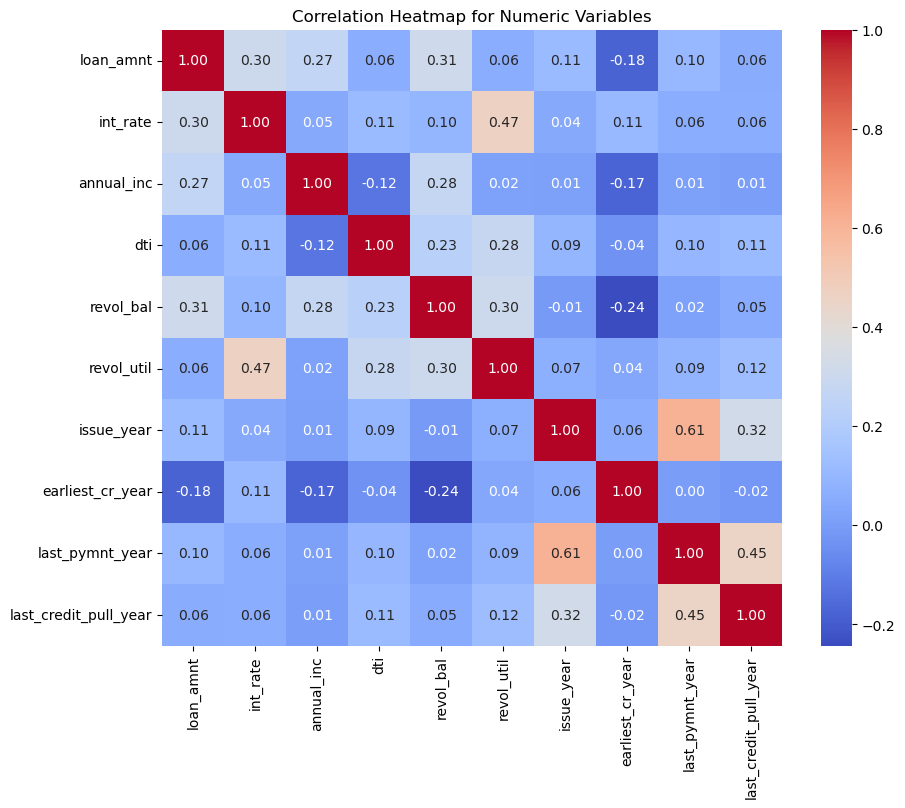

"we can see that the int_rate and revol_bal are very well correlated meaning the lenders are offering loans to borrowers with high 'revol_util'\nalbeit at a high interest rate\n\nAnother interesting find is that the 'earliest_credit_year' is negatively correlated with revol_balance,\nwe can infer that borrowers with long credit history seem to have better crdeit managing capabilities\n\nwe also see high correlation between 'issue_year' and 'last_payment_year' this just means that the loans that \nhave been issued later have a later last_payment date which is to be expected and doesnt provide any other insight"

In [6]:
#A correlation heatmap for the numeric variables and date columns

# the numeric columns to include in the heatmap
numeric_variables = ["loan_amnt", "int_rate", "annual_inc", "dti", "revol_bal", "revol_util"]

# the date columns to be analysed

loan_df['issue_year'] = loan_df['issue_d'].dt.year
loan_df['earliest_cr_year'] = loan_df['earliest_cr_line'].dt.year
loan_df['last_pymnt_year'] = loan_df['last_pymnt_d'].dt.year
loan_df['last_credit_pull_year'] = loan_df['last_credit_pull_d'].dt.year

correlation_variables = numeric_variables + ['issue_year','earliest_cr_year', 'last_pymnt_year', 'last_credit_pull_year']
correlation_matrix = loan_df[correlation_variables].corr()

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Numeric Variables")
plt.show()

'''we can see that the int_rate and revol_bal are very well correlated meaning the lenders are offering loans to borrowers with high 'revol_util'
albeit at a high interest rate

Another interesting find is that the 'earliest_credit_year' is negatively correlated with revol_balance,
we can infer that borrowers with long credit history seem to have better crdeit managing capabilities

we also see high correlation between 'issue_year' and 'last_payment_year' this just means that the loans that 
have been issued later have a later last_payment date which is to be expected and doesnt provide any other insight'''






In [7]:
# univariate_analysis

#defining a function to call whenever we need to plot a variable and its count based on the loan_status

def plot_variable(variable, df=loan_df, loan_status='Charged Off'):
    
    filtered_df = df[df['loan_status'] == loan_status]
    grouped = filtered_df.groupby(variable)[variable].count()

    # Creating the bar plot
    plt.figure(figsize=(10, 6))
    grouped.plot(kind="bar", color='skyblue')
    plt.xlabel(variable)
    plt.ylabel("Count")
    plt.title(f"Count of {variable} for {loan_status.capitalize()}")
    plt.xticks(rotation=45)
    plt.show()


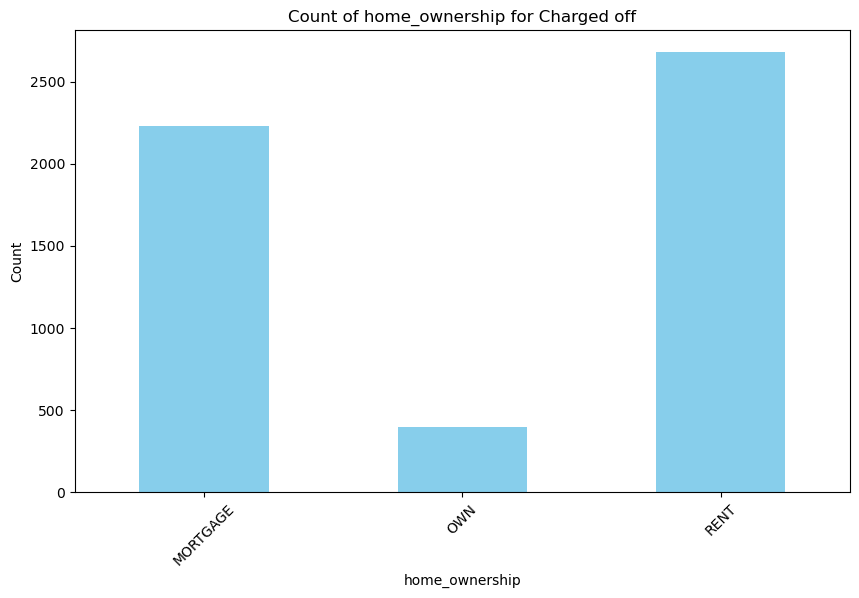

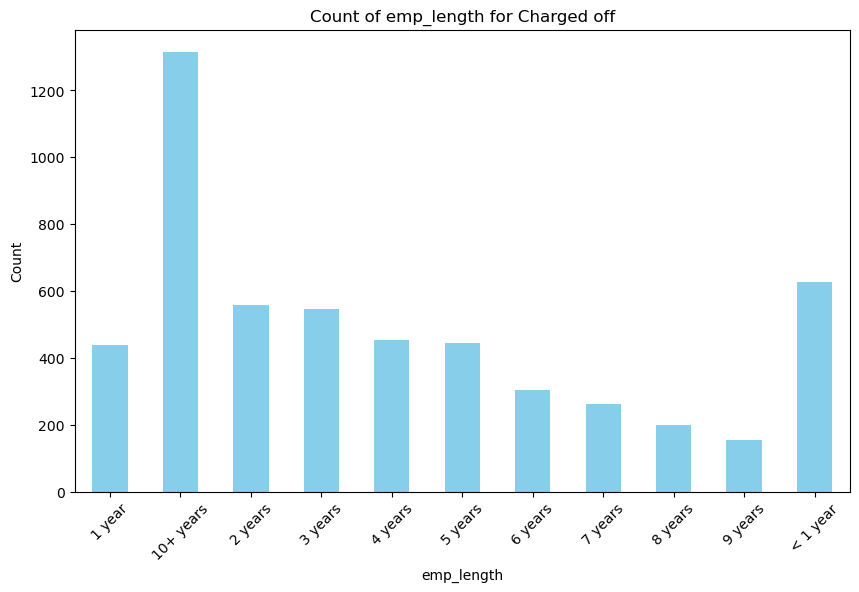

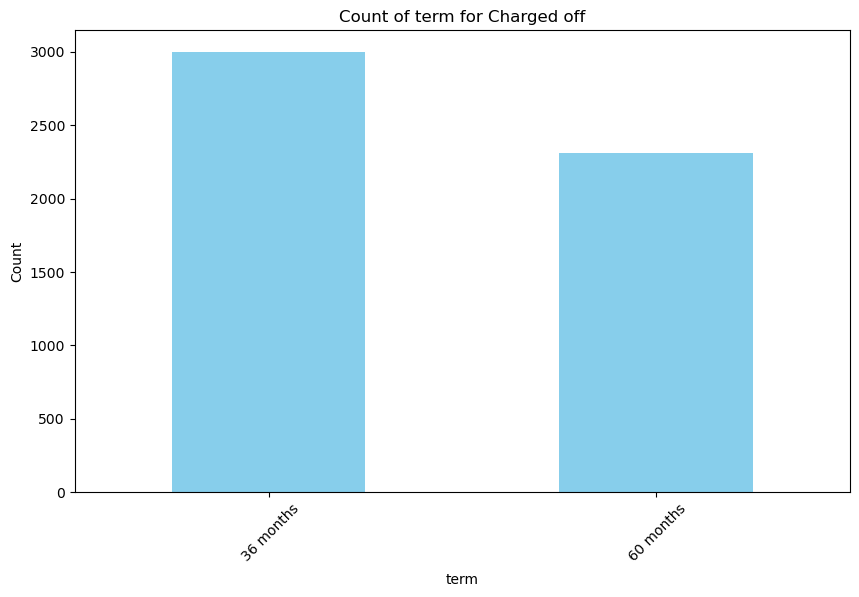

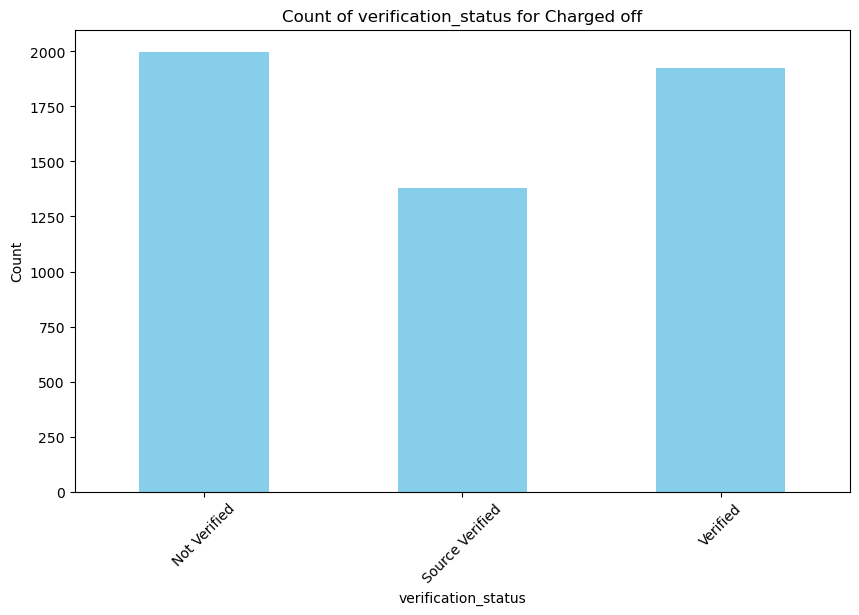

'here the defaulters are more or less same for not verified and verified while we can think that, hence this metric isnt a good indicator\nto determine defaulters, it could also be that the lender is simply providing most loans after verifying the borrower and hence\nthe number of verified borrowers is simply greater.\n\nThe same reason can be attributed as to why source verfied hase the least default over verfied when it should be the other way\nthe number of loans source verfied loans provided are small'

In [8]:
# loan_status 'charged off' univariate analysis

plot_variable('home_ownership')

'''we can clearly see that borrower who own a home default the least, but this could also mean that the 
lender's clients majorly are borrowers that are rented or are under mortgage. 
we also see that between rented and mortgage category, the rented borrower performs slightly worse'''

plot_variable('emp_length')

'''Here it is clear that borrowers that have been employed for less than a year default the most and are risky candidates for a loan.

The defaulters are more of less the same for years 1 through 5 while those employed more than 5 years tend to default signnificantly less.

The high number of defaulters for 10+ years is simply because borrowers employed more than 10+ years 
are all gropued together resulting in a high number of borrowers in the category and not to be concluded that they tend to default more.'''

plot_variable('term')

'''It is clear here that loans of the tenure 60 months tend to default way less than shorter termed loans'''

plot_variable('verification_status')

'''here the defaulters are more or less same for not verified and verified while we can think that, hence this metric isnt a good indicator
to determine defaulters, it could also be that the lender is simply providing most loans after verifying the borrower and hence
the number of verified borrowers is simply greater.

The same reason can be attributed as to why source verfied hase the least default over verfied when it should be the other way
the number of loans source verfied loans provided are small'''



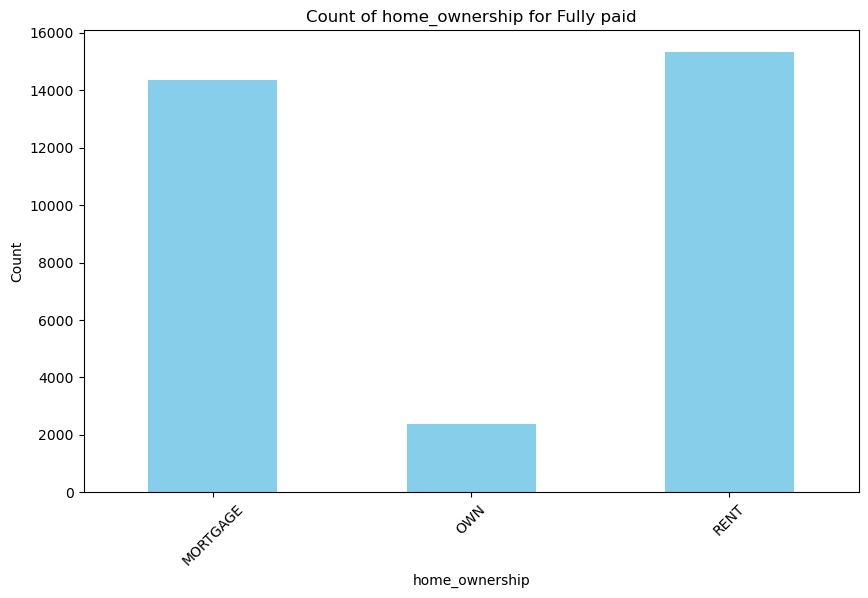

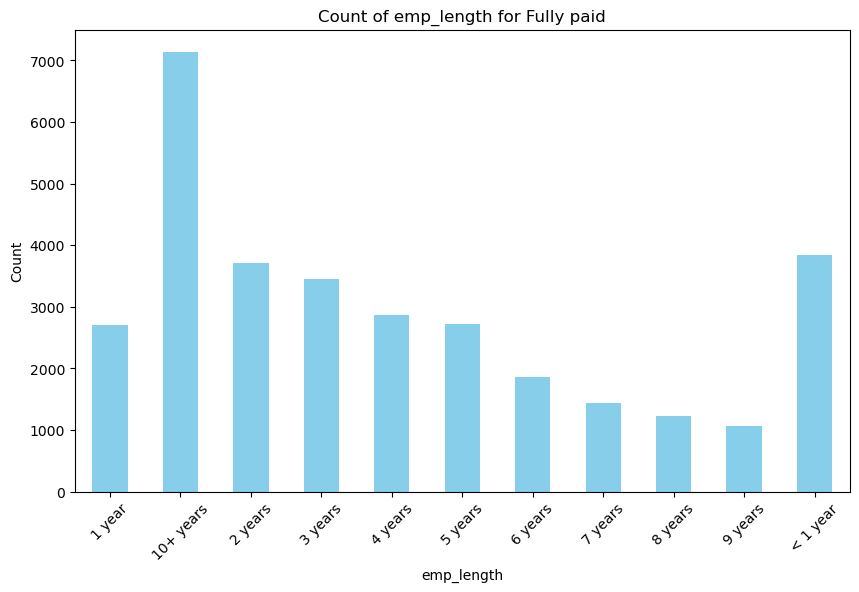

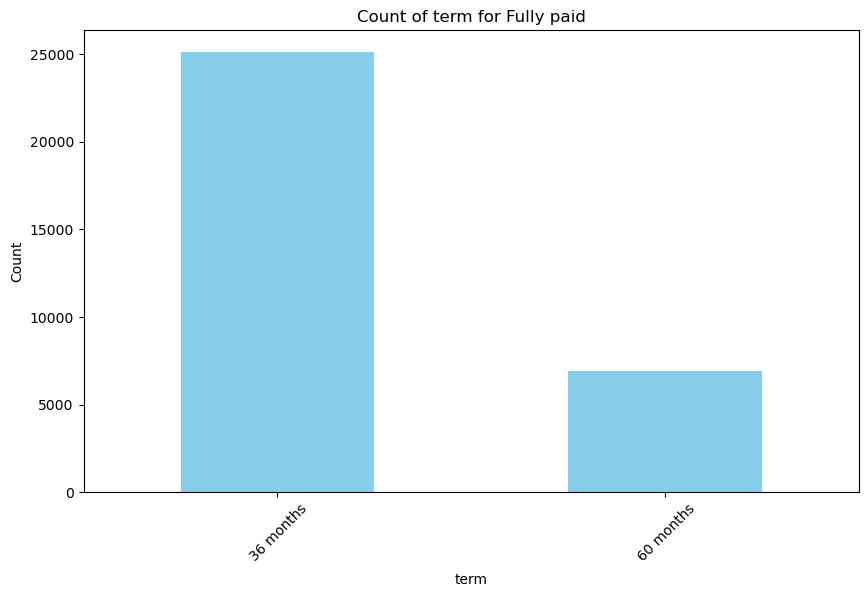

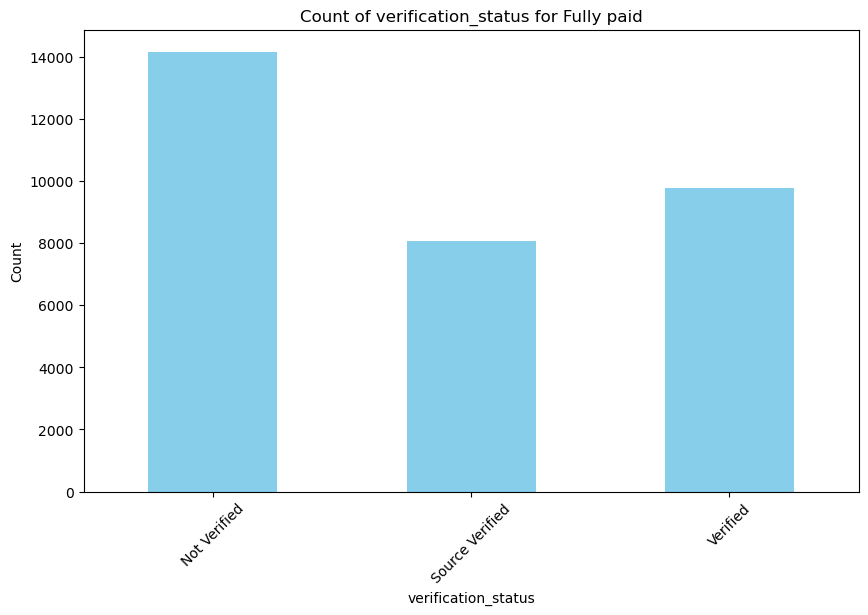

The segmented univariate analysis based on loan_status on various categorical variables done above tells us that there isnt 
compelling evidence to take a position with respect to default on loans and that we need to further our analysis with 
derived metrics and bivariate analysis to get a better picture


In [9]:
#univariate analysis for loan_status 'finished'

plot_variable('home_ownership',loan_status='Fully Paid')

'''this clearly shows our assumption is right about the number of loans provided to home owners being low, 
as we can see the category being so low we can exclude from our analysis, the lender majorly has mortgageg and rneted customers 
and both perform more or less the same with respect to default'''

plot_variable('emp_length',loan_status='Fully Paid')

'''our earlier conclusion that borrowers with <1 year of employment seem to default more seem to be wrong, the bar plot here
is identical to charged off plot and could only mean that there are just more loan applicants that have a job experience of around <1 to 5years
'''

plot_variable('term',loan_status='Fully Paid')

'''Again here our previous conslusion is wrong, there are more defaulters for loan term 36 months simply beacuse its a larger sample size,
as is clear here with such a high number of loans of tenure 36 months do successfully pay off the loan'''

plot_variable('verification_status',loan_status='Fully Paid')

'''Similar to the conclusions above being wrong, this assumption that more number of loans are provided after verification
is false as a high number of Not verified loans are being given and being successfully finished. This indicates verifcation_status 
alone may not be a good indicator of default'''

print('''The segmented univariate analysis based on loan_status on various categorical variables done above tells us that there isnt 
compelling evidence to take a position with respect to default on loans and that we need to further our analysis with 
derived metrics and bivariate analysis to get a better picture''')



In [10]:
# derived metrics

# writing a fn for deriving the median of various numerical variables like annual_inc, loan_amnt etc and grouping by loan_status 

def plot_median_variable(variable, df=loan_df):
    grouped = df.groupby('loan_status')
    
    # Calculating the median for the specified variable
    median = grouped[variable].median()
    median = median.reset_index()

    # Creating the bar plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=median, x='loan_status', y=variable)
    
    for index, row in median.iterrows():
        ax.text(index, row[variable], f'Median: {row[variable]:.2f}', ha='center', va='bottom')

    plt.title(f'Median {variable} by Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(f'Median {variable}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




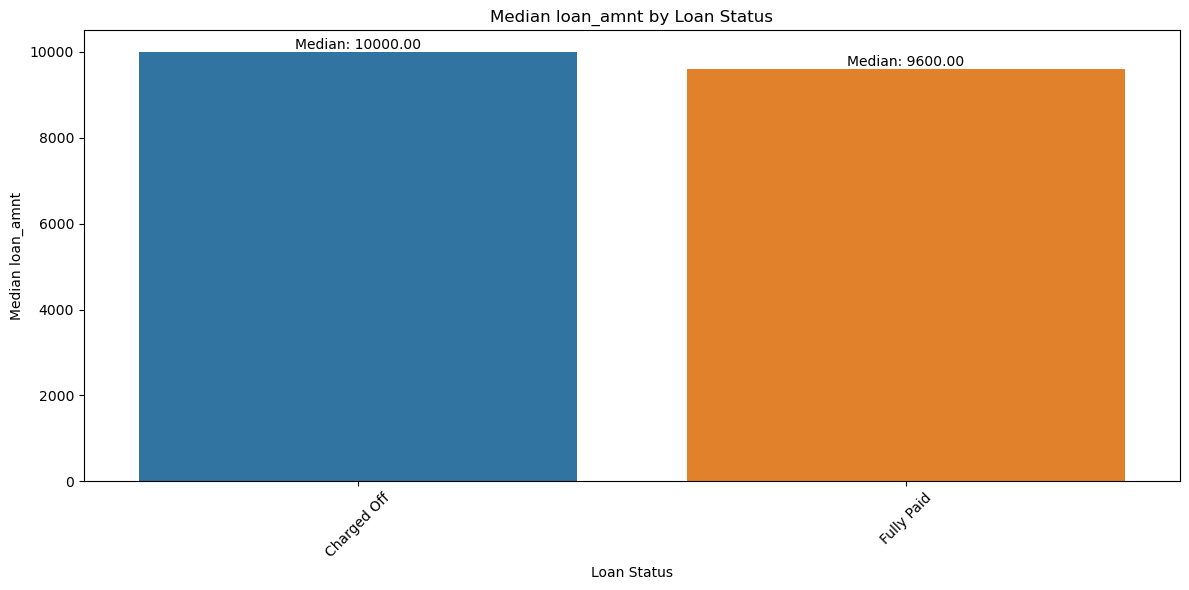

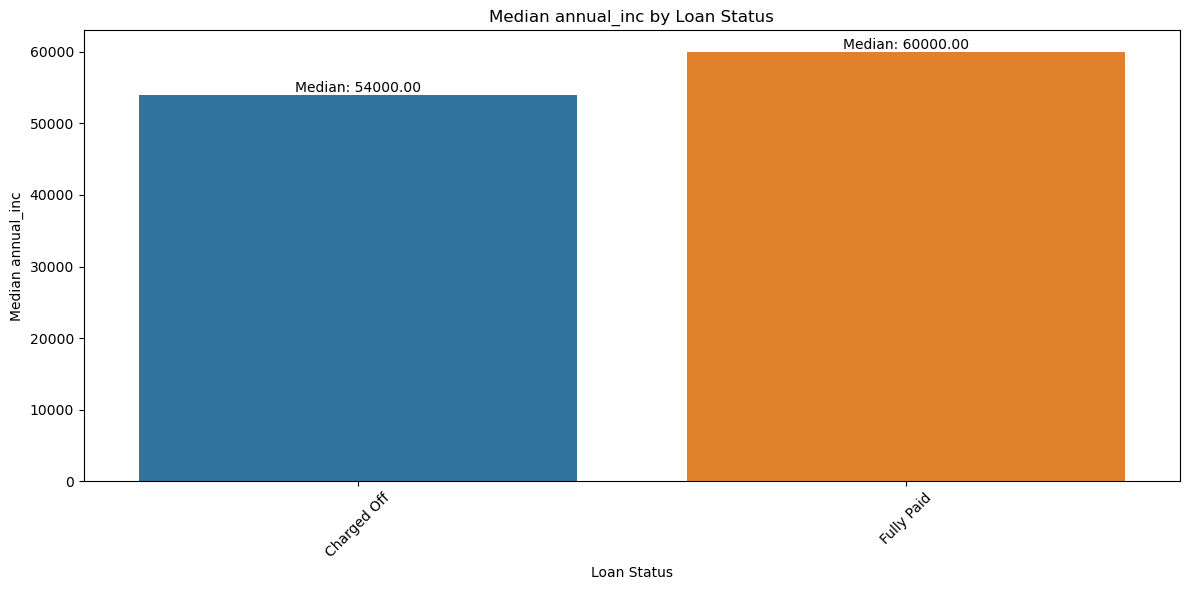

'This does show that the fully paid borrowers have a higher income than the defaulters by around 11%'

In [11]:
# analysing the derived metrics for various variables based on loan_status

plot_median_variable('loan_amnt')

'''This shows us that there is not any significant difference between the loan amount provided to charged off and fully paid
hence we can conclude this metric is not relevant for analysis'''

plot_median_variable('annual_inc')

'''This does show that the fully paid borrowers have a higher income than the defaulters by around 11%'''

In [12]:
# fn for creating a grouped box plot for analysing the mean and median for variables like revol_util,int_rate etc..

# revol_util - The percentage of credit the borrower has utilised in all lines of credit available to them

# both mean and median are plotted to just show the influence of outliers on the data,conclusions if any will be based on the median plot

def plot_mean_median_variable(variable, df=loan_df):
    
    plt.figure(figsize=(12, 6))
    
    # Creating the box plot for mean values
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x='loan_status', y=variable)
    plt.title(f'Mean and Median {variable} by Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(f'{variable}')
    plt.xticks(rotation=45)
      
    # Creating the box plot for median values
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='loan_status', y=variable)
    plt.title(f'Mean and Median {variable} by Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(f'{variable}')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()
    
    # Calculate the median values for "Fully Paid" and "Charged Off" categories
    fully_paid_median = df[df['loan_status'] == 'Fully Paid'][variable].median()
    charged_off_median = df[df['loan_status'] == 'Charged Off'][variable].median()

    # Printing the median values
    print(f'Median for Fully Paid: {fully_paid_median}')
    print(f'Median for Charged Off: {charged_off_median}')



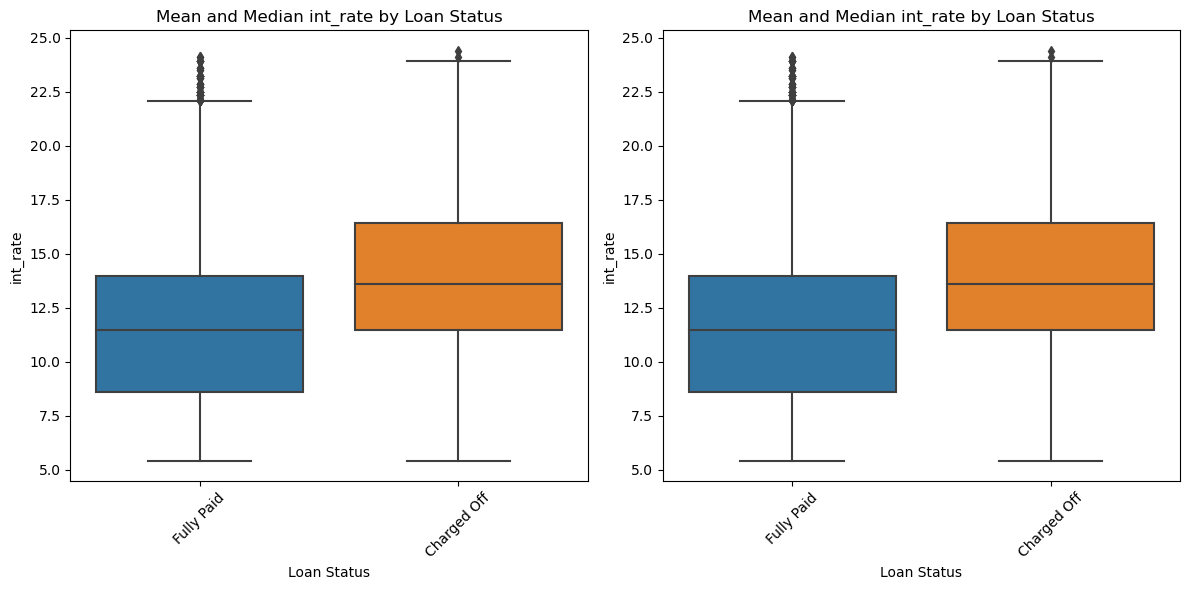

Median for Fully Paid: 11.49
Median for Charged Off: 13.61


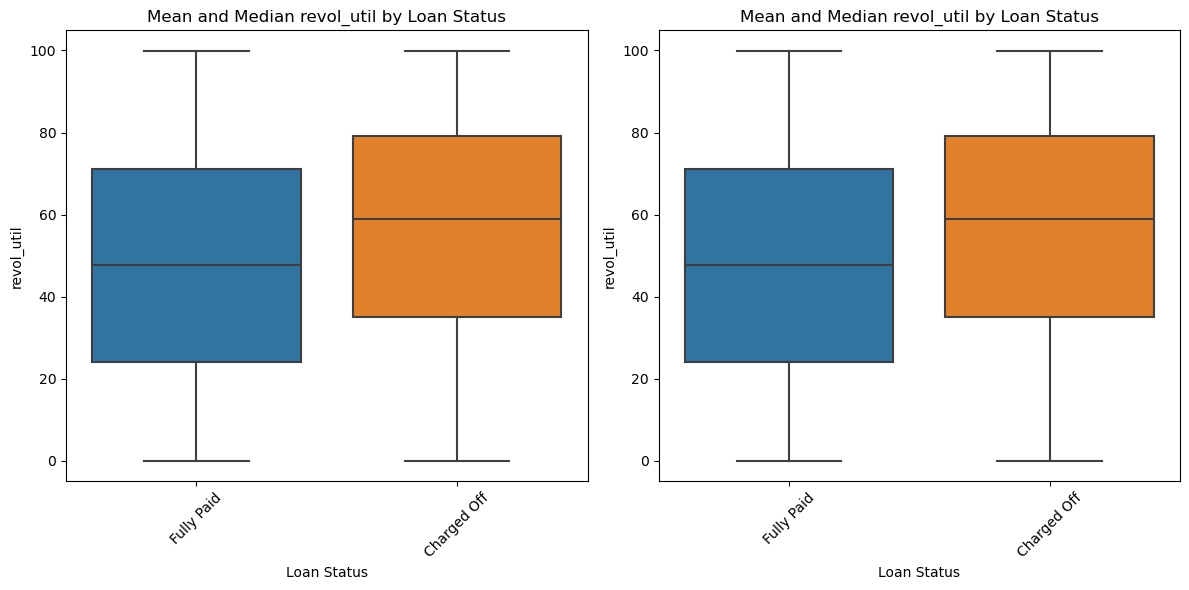

Median for Fully Paid: 47.8
Median for Charged Off: 59.0


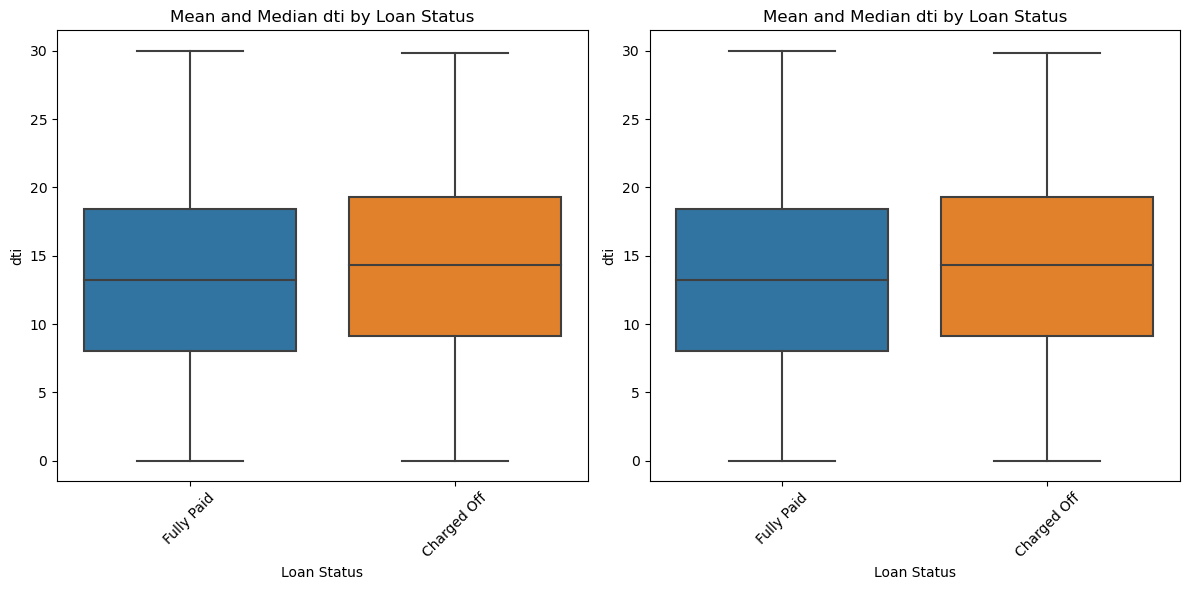

Median for Fully Paid: 13.22
Median for Charged Off: 14.33

we found that the variables int_rate and revol_util differentiate between the two borrowers very well.
 

Next we can analyse how the int_rate, revol_util and loan_amnt are distributed against the various categorical variables 
in a bivariate analysis


In [19]:

plot_mean_median_variable('int_rate')

'''Here it is clear that the median int_rate of defaulters is nearly 20% more than the interest for the other borrowers'''

plot_mean_median_variable('revol_util')

'''Here again the difference is even more drastic with the revol_util median for defaulters more than 20% higher than 
those who repaid the loan successfully

As revol_util is an improtant indicator of credit worthiness, here it is clear that the defaulters have already 
used up close to 60% of their existing credit lines'''

plot_mean_median_variable('dti')

'''The debt to income ratio doesnt seem to be a good metric to analyse as there's not much difference between the defaulters 
and the other borrowers, This is in line with our observation that the loan_amnt and annual_inc dont play a major role in 
identifying potential defaulters'''

print()

print('''we found that the variables int_rate and revol_util differentiate between the two borrowers very well.
 \n\nNext we can analyse how the int_rate, revol_util and loan_amnt are distributed against the various categorical variables 
in a bivariate analysis''')

In [14]:
#bivariate analysis

#fn to compare the derived metrics like median of int_rate and revol_util with the categorical variables

def plot_bivariate(variable='home_ownership', df=loan_df):
    numerical_variables = ['int_rate', 'revol_util', 'loan_amnt']
    
    grouped = df.groupby(['loan_status', variable])
    
    # Calculating the median for the specified variable
    median = grouped[numerical_variables].median()
    median = median.reset_index()
    
    for num_var in numerical_variables:
        # Create a bar plot for the given numerical variable
        plt.figure(figsize=(12, 10))
        ax = sns.barplot(data=median, x=variable, y=num_var, hue='loan_status')
        plt.title(f'{variable.capitalize()} vs. {num_var.capitalize()} (Median) by Loan Status')
        plt.xlabel(variable.capitalize())
        plt.ylabel(f'Median {num_var.capitalize()}')
        plt.xticks(rotation=45)
    
        for p in ax.patches:
            ax.annotate(f'Median: {p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

    
        plt.tight_layout()
        plt.show()

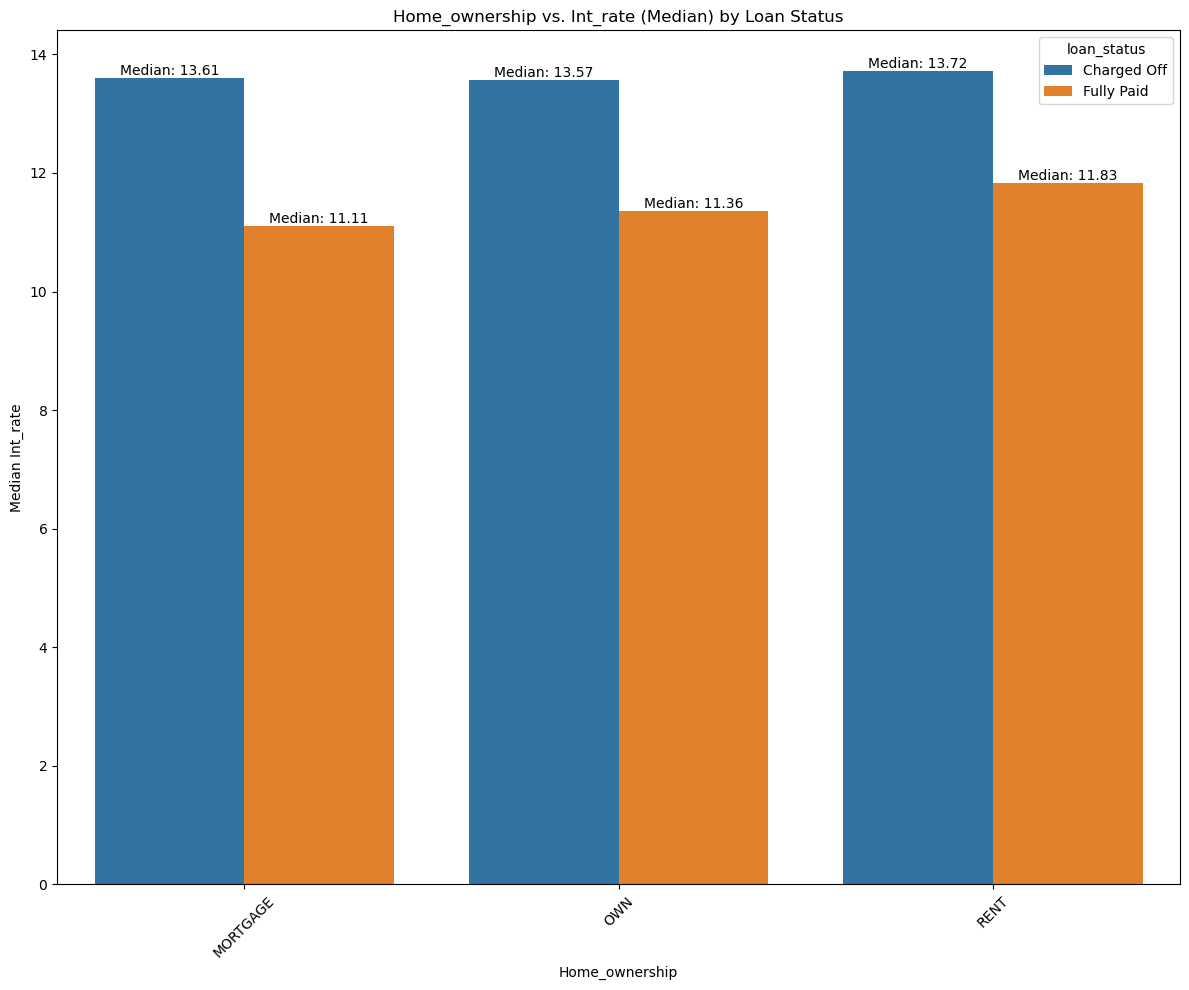

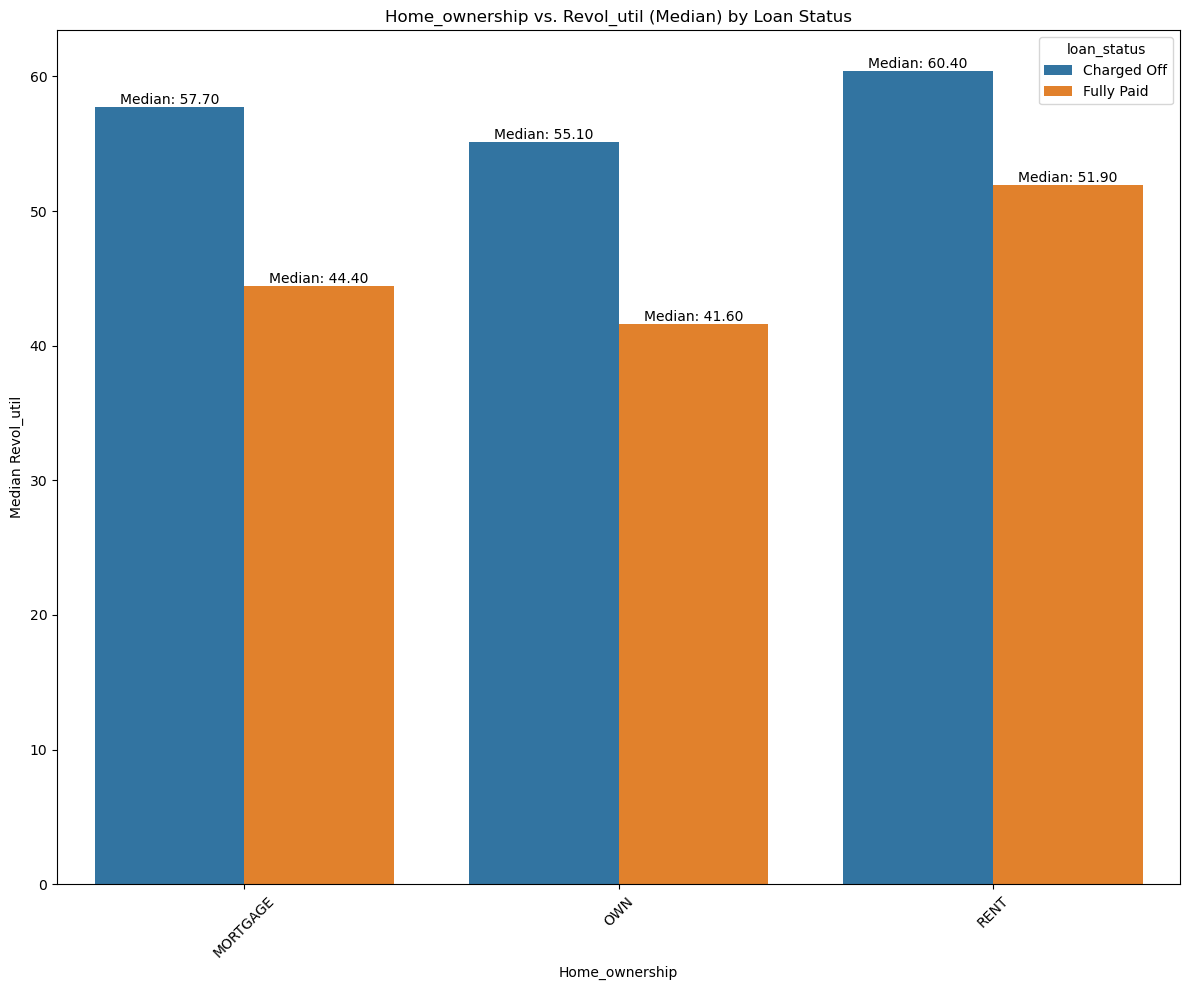

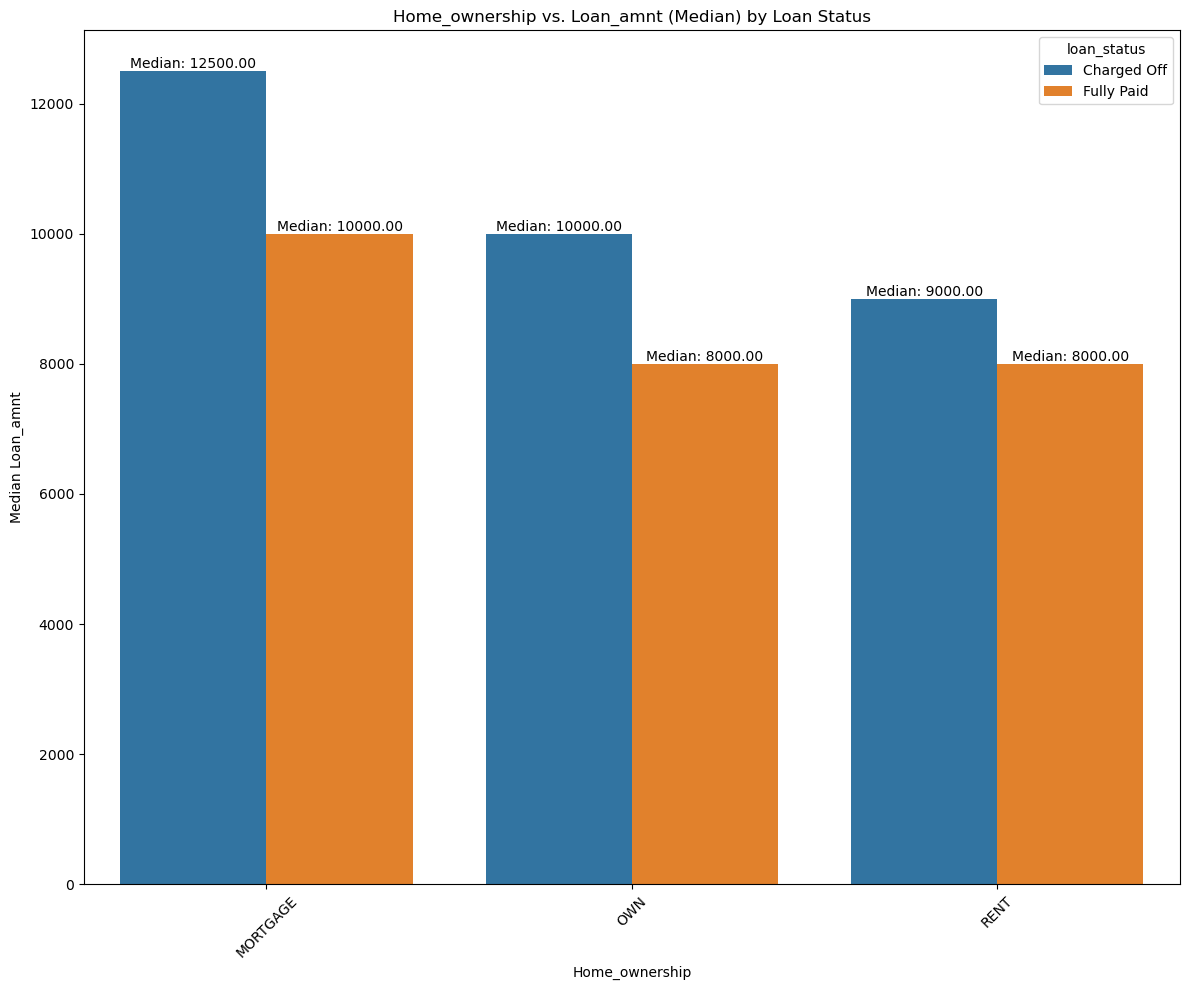

It is clear here that the defaulters are suffering from high interest across all three categories of home_ownership.

55% in revol_util seems to be the median cutoff point above which the the borrowers starts defaulting, also borrowers
who rent a house are using more of their available credit lines.

The loan_amnt given to mortgaged defaulters is comparably high coupled with high interest could be a cause for defaulting.


In [15]:
#call the fn for 'home_ownership'

plot_bivariate('home_ownership')

print('''It is clear here that the defaulters are suffering from high interest across all three categories of home_ownership.

55% in revol_util seems to be the median cutoff point above which the the borrowers starts defaulting, also borrowers
who rent a house are using more of their available credit lines.

The loan_amnt given to mortgaged defaulters is comparably high coupled with high interest could be a cause for defaulting.''')


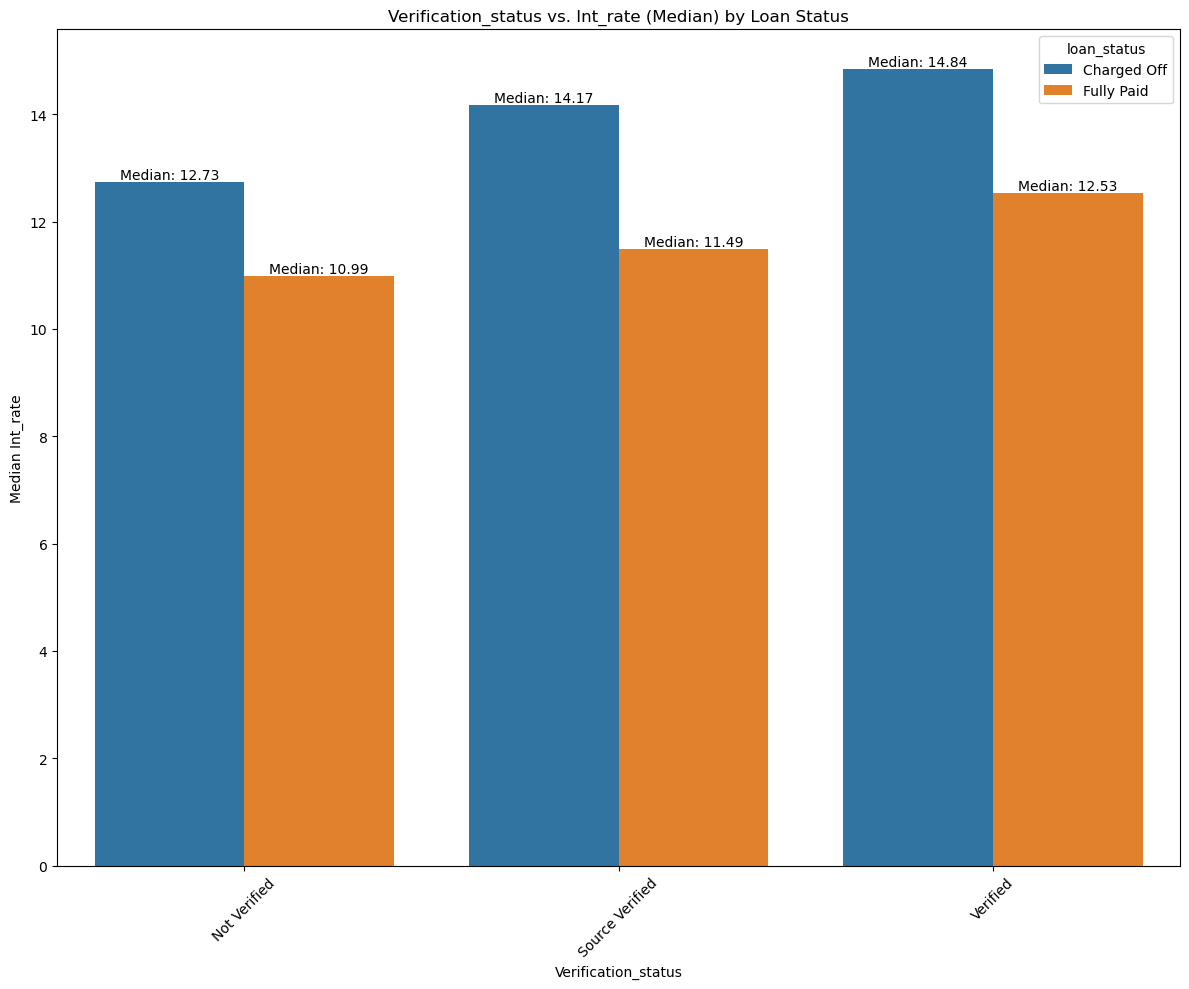

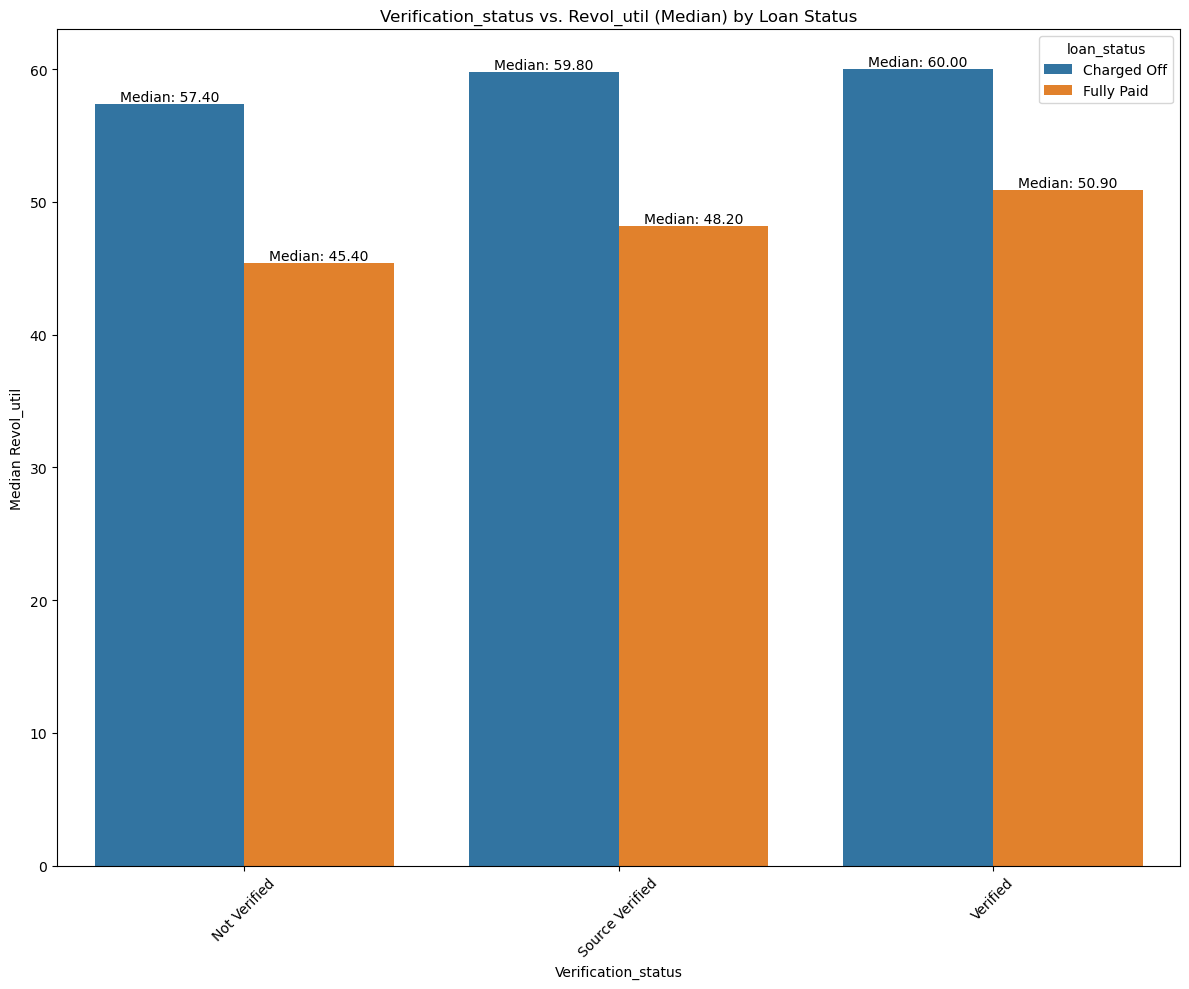

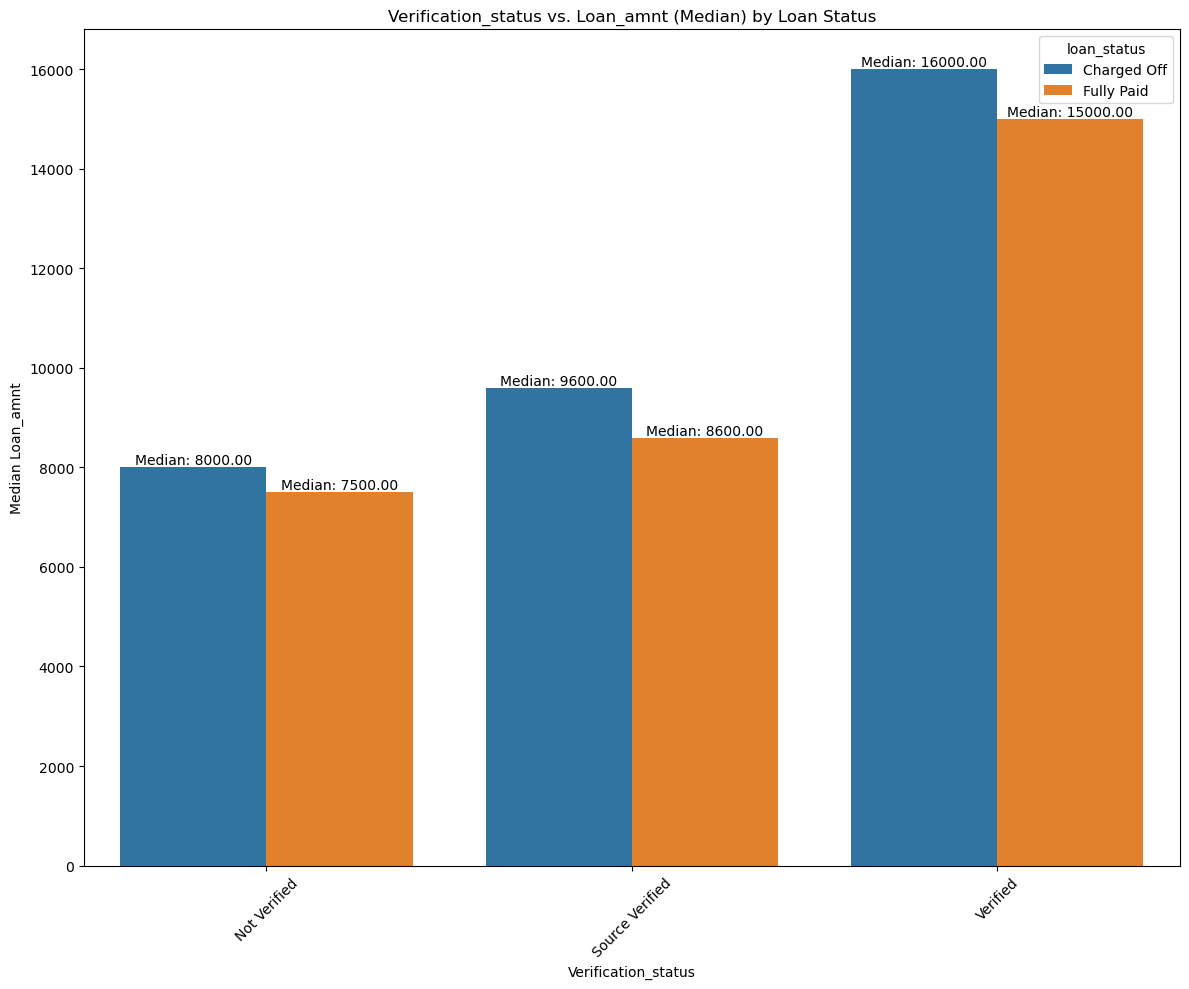

Now the question of why such a high number of verified and non_verfied were defaulting is answered
The verified borrowers who have defaulted are having to face a median interest of 15% which is very high.

The revol_util rate of the defaulters here is more or less the same so can be concluded to not play a major role in 
defaulting. 

The loan_amnt given to verified borrowers ideally should be comparably high but here its 100% more than the amount 
santioned for not_verified borrowers. This coupled with high interest is causing a huge number of defaulters even though they are verified.


In [16]:
#calling the fn for 'verification_status'

plot_bivariate('verification_status')

print('''Now the question of why such a high number of verified and non_verfied were defaulting is answered
The verified borrowers who have defaulted are having to face a median interest of 15% which is very high.

The revol_util rate of the defaulters here is more or less the same so can be concluded to not play a major role in 
defaulting. 

The loan_amnt given to verified borrowers ideally should be comparably high but here its 100% more than the amount 
santioned for not_verified borrowers. This coupled with high interest is causing a huge number of defaulters even though they are verified.''')

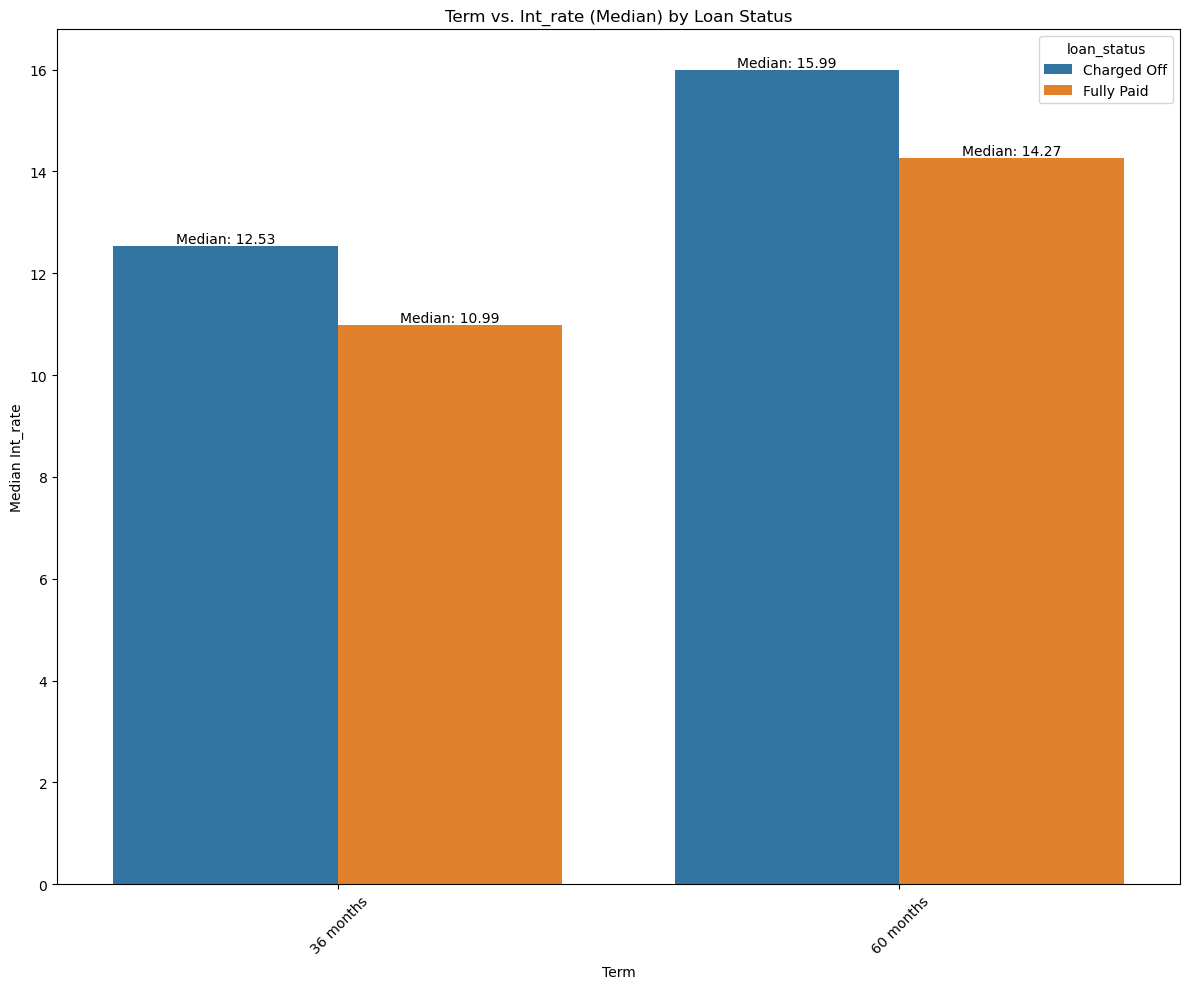

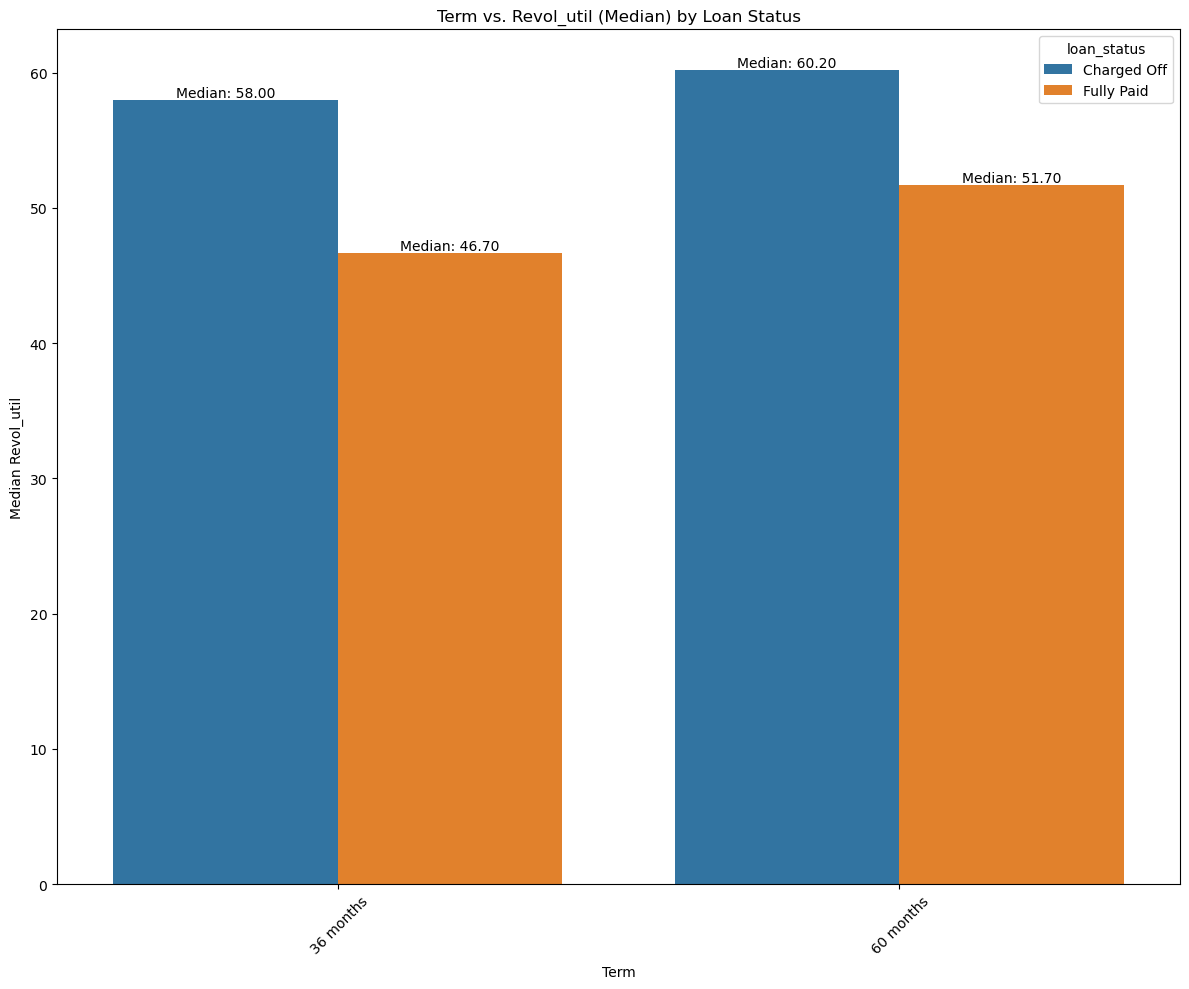

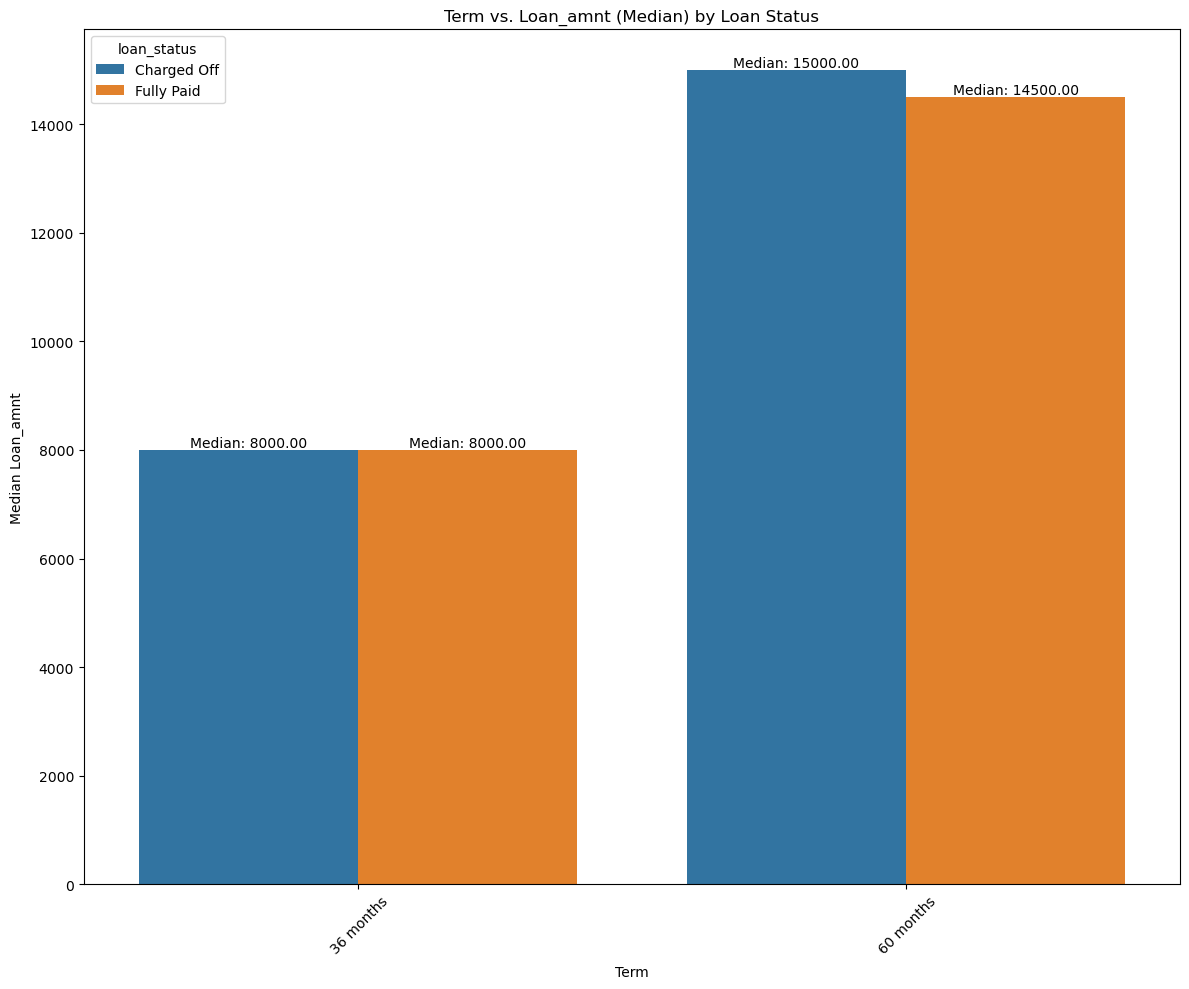

The median int_rate here is 16% for 60 months, and the loan amount santioned is nearly 90% more than whats santioned,
for loan tenure of 36 months, while it makes sence that longer termed loans have a higher santioned amount coupled with the 
high interest could be causing default.

The revol_util does not seem to play a major role in defaulting here.


In [18]:
#calling the fn for 'term

plot_bivariate('term')

print('''The median int_rate here is 16% for 60 months, and the loan amount santioned is nearly 90% more than whats santioned,
for loan tenure of 36 months, while it makes sence that longer termed loans have a higher santioned amount coupled with the 
high interest could be causing default.

The revol_util does not seem to play a major role in defaulting here.''')


In [ ]:
print('further insights have drawn been on the pdf file')